# Project Week 1                                     <a id="chapter1"></a>
# Table of Contents

* [Project Week 1                                    ](#chapter1)
* [Student details](#chapter2)
* [Project Description                                         ](#chapter3)
* [Data                                    ](#chapter4)
* [Predictive Power of Tie Strength                                    ](#chapter5)
* [Predictive Power of the Number of Open Triades                                    ](#chapter6)
* [Ranking Friends of Friends                                    ](#chapter7)
* [Under construction                          ](#chapter8)


# Student details <a id="chapter2"></a>

Please enter the student numbers and names in the cell below.

* Jelle van den Brink - s2743450
* Tim Angevare - s2744007

# Project Description                                          <a id="chapter3"></a>



Faculty employees at research universities have two major activities: teaching and research. The research is often done in collaboration with colleagues, which results in a joint publication. In this project we will analyse collaborations within the EWI department of the University of Twente based on joint publications. Such investigations are important in order to enhance the research results and applications, and in order to allocate the limited funding to the right research groups and topics.

We represent each researcher as a vertex of a graph. We draw an undirected edge between two vertexes, if the corresponding two researchers have published a joint paper. The resulting graph is called a collaboration graph. We may label each edge as a weak or strong tie depending on the number of joint papers.
In this project we want to verify the following hypotheses:


In this project we want to verify the following hypotheses:

*	The collaborations adhere to the strong triadic closure property: if two researchers A and C both actively collaborate with researcher B, then the chance is high that A and C will collaborate in the future.
*	The large number of open triades, in which two researchers participate, implies that there is a high probability that the two researchers will collaborate in the future.

You task is to explore the given data and make a case whether or not the above hypotheses are true. Additionally, you will have to develop an algorithm that ranks friends of friends by decreasing likelihood of becoming a friend in the future.

In [1]:
# The following includes are needed to work with graphs and display solutions.
%matplotlib inline
# Extra package need to be installed on Google Colab.
!apt install libgraphviz-dev
!pip install pygraphviz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from IPython.display import display
from collections import Counter
import utils
import graphs


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 9 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 

# Data                                     <a id="chapter4"></a>
The project is based on the UT collaboration graph. We made snapshots of the UT collaboration graph up to 1995 and up to 2015. The number of publications written by two researchers is noted as the weight of this edge. The following two statements load the collaborations up to these years. Note that they take some time to complete.

In [2]:
G1995 = utils.fromDot(open('bib-graph-1995.dot').read())
G2015 = utils.fromDot(open('bib-graph-2015.dot').read())

For example, in 1995, the researcher 283261 collaborated with researcher 176766, 520454, 617192, 729772, and 797848 and wrote with them 1, 6, 1, 5, and 2 papers respectively. This can be seen as follows:

In [ ]:
G1995['283261']

AdjacencyView({'617192': {0: {'weight': '1.000000'}}, '729772': {0: {'weight': '5.000000'}}, '520454': {0: {'weight': '6.000000'}}, '797484': {0: {'weight': '2.000000'}}, '176766': {0: {'weight': '1.000000'}}})

# Predictive Power of Tie Strength                                     <a id="chapter5"></a>

Show that the probability of a new collaboration to be formed in an open triangle A -- B -- C is increasing with the strength of A -- B and B -- C, using a regression prediction. The tie strength is defined as $\frac{(x+y)}{2}$, where $x$ is the number of collaborations between A and B, and $y$ is the number of collaborations between B and C. The probability is defined as the chance that a new edge has formed between A and C between the G1995 and G2015 graph. You have to draw a  graph (with axis's lables and units) to illustrate your answer.


In [23]:
from itertools import combinations
result = {}

def check_edge_existence(first, second, graph):
  return (first, second) in graph.edges() or (second, first) in graph.edges()

def save_tie_strength(A, C, strength):
  if strength not in result:
      result[strength] = {'edge' : 0, 'no_edge' : 0}

  if check_edge_existence(A, C, G2015):
    result[strength]['edge'] +=  1
  else:
    result[strength]['no_edge'] += 1

def get_all_tie_strength(ties):
  for n1, n2 in combinations(ties.keys(), 2):
        if not check_edge_existence(n1, n2, G1995):
          tie_strength = (int(float(ties[n1][0]['weight'])) + int(float(ties[n2][0]['weight']))) / 2
          save_tie_strength(n1, n2, tie_strength)

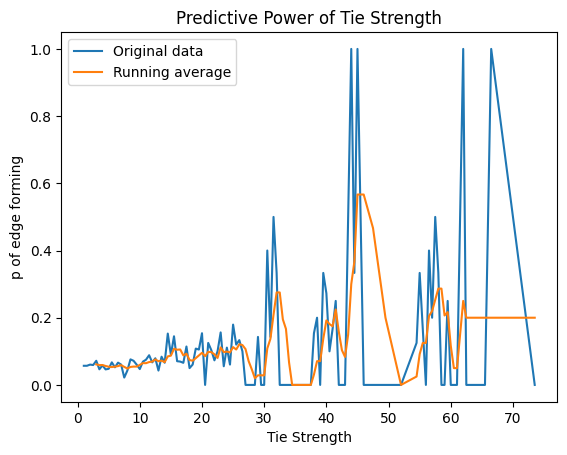

In [24]:



for node in G1995.nodes():
  ties = G1995[node]
  if len(ties) < 2:
    continue
  else:
    get_all_tie_strength(ties)
ts_p = []
ts_list = []

for tie_strength in result:
  ts_list.append(tie_strength)
  edge = result[tie_strength]['edge']
  no_edge = result[tie_strength]['no_edge']
  ts_p.append(edge / (edge + no_edge))

ts_list, ts_p = zip(*sorted(zip(ts_list, ts_p)))

window = 5
ts_ra = [np.nan for n in range(window - 1)]
for point in range(len(ts_p) - window + 1):
  ts_ra.append(np.mean(ts_p[point:point+window]))

plt.plot(ts_list, ts_p, label='Original data')
plt.plot(ts_list, ts_ra, label = 'Running average')
plt.xlabel("Tie Strength")
plt.ylabel("p of edge forming")
plt.title("Predictive Power of Tie Strength")
plt.legend()
plt.show()


*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension)

So we loop through every node in 1995 that has more than 1 friend. For everynode we find its adjacent friends and come up with every combination of two. With these two nodes we calculate the ammount of collaborations with our node and use this to calculate the tie strength. Then we check if an edge has formed between these two nodes in 2015 and recorde this.

In the end we plot the tie strength against the frequency of successfull edges formed between friends.

# Predictive Power of the Number of Open Triades                                     <a id="chapter6"></a>

Find a regression model to evaluate whether the number of open triades influences the probability that a new collaboration is formed between 1995 and 2015. For example, node A and C do not have an edge, but could be connected by B (one open triad), A and D (two open triades) or even A, D and E (three open triades) and so forth. You have to draw a graph (with axis's lables and units) to illustrate your answer.

In [10]:
result = {}

def save_num_triad(A, C, num):
  if num not in result:
      result[num] = {'edge' : 0, 'no_edge' : 0}

  if check_edge_existence(A, C, G2015):
    result[num]['edge'] +=  1
  else:
    result[num]['no_edge'] += 1

def write_frequency_step_nodes_to_results(nodes_step_further, orgin_node):
  for dest_node in nodes_step_further:
    save_num_triad(orgin_node, dest_node, nodes_step_further[dest_node])

def calc_number_open_triads_node(ties, node):
  nodes_step_further= {}
  for adjacent_node in ties:
    ties_step_over = G1995[adjacent_node]
    for two_step_node in ties_step_over:
      if two_step_node not in nodes_step_further and not check_edge_existence(node, two_step_node, G1995):
        nodes_step_further[two_step_node] = 1
      elif two_step_node in nodes_step_further:
        nodes_step_further[two_step_node] += 1
  return nodes_step_further

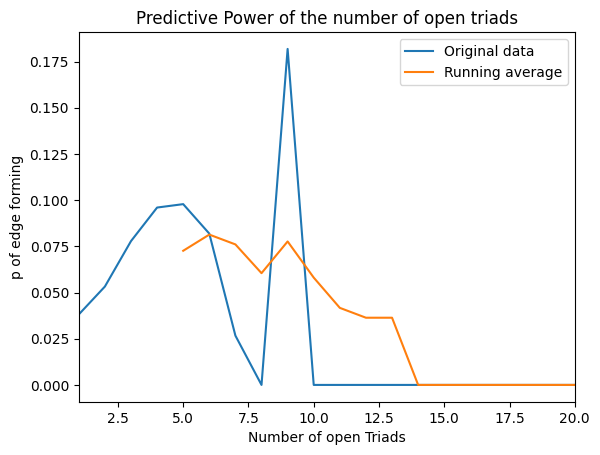

In [14]:
for node in G1995.nodes():
  ties = G1995[node]
  write_frequency_step_nodes_to_results(calc_number_open_triads_node(ties,node), node)

#Show data in figure
ot_p = []
ot_list = []
freq = []

for num_open_triad in result:
  ot_list.append(num_open_triad)
  edge = result[num_open_triad]['edge']
  no_edge = result[num_open_triad]['no_edge']
  ot_p.append(edge / (edge + no_edge))
  freq.append((edge + no_edge))

# Sort data
ot_list, ot_p = zip(*sorted(zip(ot_list, ot_p)))

# Create running average
window = 5
ot_ra = [np.nan for n in range(window - 1)]
for point in range(len(ot_p) - window + 1):
  ot_ra.append(np.mean(ot_p[point:point+window]))

#   Configure plot
plt.clf()
plt.xlim([1,20])
plt.plot(ot_list, ot_p, label='Original data')
plt.plot(ot_list, ot_ra, label = 'Running average')
plt.xlabel("Number of open Triads")
plt.ylabel("p of edge forming")
plt.title("Predictive Power of the number of open triads")
plt.legend()
plt.show()
#print(freq)

*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension)

This algorithm works by looking through every node and to find the number of paths that lead through another node towards the same nodes. the amount of paths is equal to the amount of open triades. Than a check if a direct edge is formed between the nodes in 2015 is used to caculate the probability.

# Ranking Friends of Friends                                     <a id="chapter7"></a>

In this exercise you should apply your knowlege gained from the two previous exercises, but not limted to, to answer a common problem in todays social media platforms: given a person, an employee in our case, generate a ranked list of his friends of friends that are likely to become his friends. At the end of the following cell, we provide a code snippet that calculates the precision of your algorithm in predicting future ties in the top-10. Note that other knowledge you gained in the lectures also can be used to solve this problem.

In [41]:
# employees to test
nodes = ['943855', '587677', '905252', '839906', '554748', '220387', '456096', '136755', '652488', '617192', '154879', '860536', '127930', '266261', '925761', '334823', '879631', '922044', '485657', '347203']
# dictionary mapping an employee to a list of employees with whom he/she collaborated in 2015 and which belonged
# to his friends of friends in 1995.
result = {'879631': ['587677', '265264', '925761', '860536', '725186', '721127', '142327', '23872', '943855'], '127930': ['26850', '935705', '136755', '659445', '805057', '293364', '681672', '565759', '868762', '596394'], '154879': ['691913', '817338', '659445', '169325', '542646', '644335', '293364', '165240', '485657', '905252', '408618'], '587677': ['879631', '725186', '785747', '70007', '561122', '136755', '721127', '142327', '72828', '334823', '839906', '433369', '943855'], '266261': ['265264', '208388', '70007', '495819', '725186', '839906', '136755', '721127', '142327', '408600'], '860536': ['811970', '879631', '456096', '839906', '396817', '136755', '653075', '72828', '596215', '346572', '922044'], '839906': ['587677', '308351', '860536', '378229', '240448', '379649', '334823', '201753', '565759', '943855', '174262', '922044', '266261'], '347203': ['265464', '578175', '136755', '596215', '220387', '906277', '897180', '652488'], '617192': ['793831', '254964', '522310', '932010', '528813', '922964', '485657', '58492', '694245', '166980', '905252'], '136755': ['811970', '127930', '587677', '266261', '815411', '422460', '860536', '347203', '943855', '691913', '174262', '922044'], '925761': ['879631', '725186', '456096', '70007', '561122', '136803', '596215', '334823', '905252', '943855'], '554748': ['23872', '916957', '659445', '169325', '644335', '293364', '220387', '433369', '943855', '174262', '922044', '652488'], '334823': ['587677', '725186', '785747', '839906', '721127', '142327', '72828', '925761', '943855', '867536'], '220387': ['450166', '571150', '565465', '901612', '554748', '18282', '883925', '347203', '9418', '943855', '265464', '652488'], '485657': ['811970', '154879', '617192', '702341', '41963', '661899', '293364', '668817', '218489'], '905252': ['23872', '742360', '561250', '523695', '222137', '617192', '564846', '925761', '661899', '571150', '154879', '691913', '392536'], '943855': ['265264', '60541', '220387', '14499', '783415', '679997', '811970', '785747', '961828', '587677', '925761', '905502', '561122', '136755', '41963', '554748', '879631', '642974', '725186', '676753', '839906', '213482', '396817', '721127', '576951', '334823', '978812'], '456096': ['206983', '925761', '706765', '860536', '565708', '296067', '902949', '549825', '201753', '961828', '240448', '922044'], '922044': ['456096', '308351', '860536', '839906', '136755', '554748', '433369', '999230', '240448'], '652488': ['602959', '60541', '846007', '143158', '347203', '422460', '14499', '554748', '220387', '265464', '9418']}

def fof(G,n):
    '''
    returns the friends of friends of Node n in Graph G
    '''
    res = set()
    for n1 in G[n]:
        res = res | set(G[n1])
    res = res - set(G[n])
    return res

# BEGIN SOLUTION
def get_tie_strength(A, B, C, G): # In A--B--C, so tie strength between A and C, assume no tie yet
  B_ties = G[B]
  tie_strength = (int(float(B_ties[A][0]['weight'])) + int(float(B_ties[C][0]['weight']))) / 2
  return tie_strength

def round_to_point_five(x):
  return round(0.5 * round(float(x) / 0.5), 1)
# END SOLUTION

def score(n, f):
    '''
    calculates a score by which potential friends should be sorted
    '''
    s = 0

    ties = G1995[n]

    open_triades = 0
    tie_strength = 0
    for adjacent_node in ties:
      ties_step_over = G1995[adjacent_node]
      for two_step_node in ties_step_over:
        if two_step_node == f and not check_edge_existence(n, two_step_node, G1995):
          open_triades += 1
          tie_strength += get_tie_strength(n, adjacent_node, two_step_node, G1995)

    tie_strength /= open_triades

    ts_index = ts_list.index(round_to_point_five(tie_strength))
    score_ts = ts_p[ts_index]

    ot_index = ot_list.index(open_triades)
    score_ot = ot_p[ot_index]
    return score_ot + score_ts

# Check
topn = 10

for n in nodes:
    # get all friends of friends and their score
    fofG1995 = fof(G1995, n)
    l = [(f,score(n,f)) for f in fofG1995 ]
    # sort descending by score
    l.sort(key=lambda x: -x[1])
    # count number of correct results
    found = 0
    for x,z in l[:topn]:
        if x in result[n]:
            found += 1
    print(n, found / float(topn))

943855 0.5
587677 0.4
905252 0.1
839906 0.4
554748 0.2
220387 0.3
456096 0.3
136755 0.1
652488 0.5
617192 0.2
154879 0.4
860536 0.2
127930 0.3
266261 0.5
925761 0.4
334823 0.5
879631 0.3
922044 0.3
485657 0.1
347203 0.3


*Explanation: (Explanation for the proposed agorithm must be added here. The code above also needs comments in details for clarity and comprehension)

This algorithm loops through every base node A and checks for every instance of A--B--C where there is no edge between A and C what the tie strength is between these and also how many open triades these share. The code then takes the corresponding probabilities of forming an edge from the previous exercises and converts these to a score.